In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['median_house_value'] = housing.target  # Add target column

# Show basic info
print("Shape:", df.shape)
print(df.head())


Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  


Missing values:
 MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup  

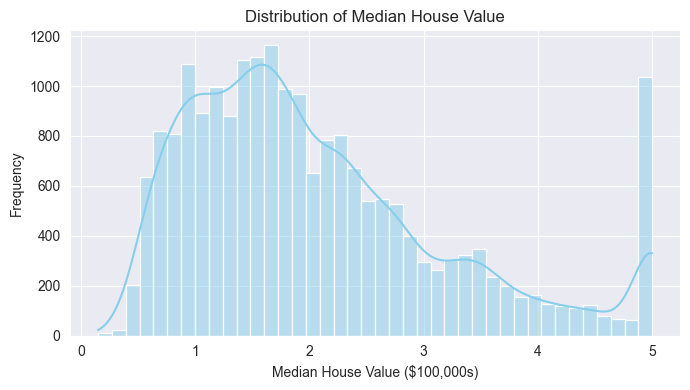

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print("\nSummary Statistics:")
print(df.describe())

# Distribution of target
plt.figure(figsize=(7, 4))
sns.histplot(df['median_house_value'], kde=True, bins=40, color='skyblue')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


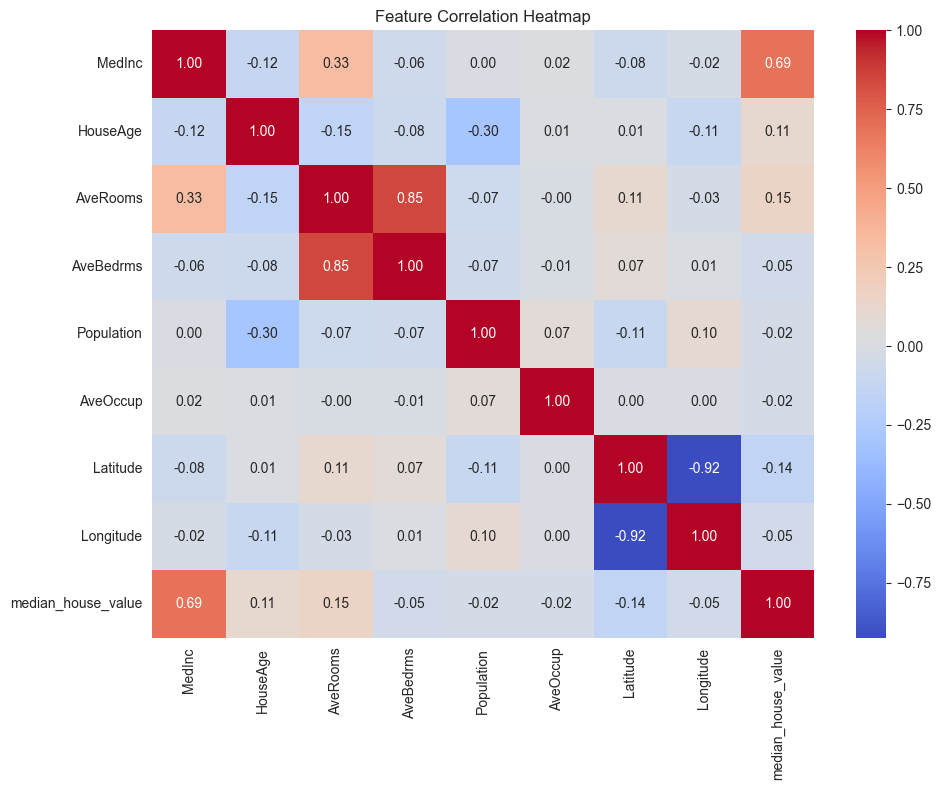

In [3]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Initialize scaler
scaler = StandardScaler()

# Fit on the full feature set and transform
X_scaled = scaler.fit_transform(X)


train test split


In [5]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (16512, 8)
Test set shape: (4128, 8)


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize KNN with k=5 (default)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit on training data
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score:  {r2:.4f}")
print(f"MAE:       {mae:.2f}")
print(f"MSE:       {mse:.2f}")
print(f"RMSE:      {rmse:.2f}")


R² Score:  0.6690
MAE:       0.45
MSE:       0.43
RMSE:      0.66


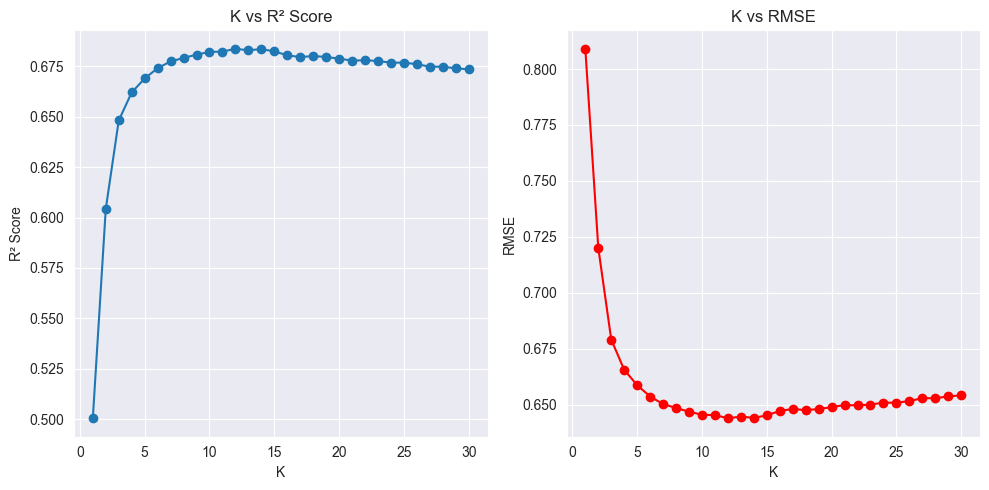

In [7]:
#tuning k value
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_scores = []
rmse_scores = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred_k))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_k)))

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, r2_scores, marker='o')
plt.title('K vs R² Score')
plt.xlabel('K')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, rmse_scores, color='red', marker='o')
plt.title('K vs RMSE')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_['n_neighbors'])
print("Best Score:", grid.best_score_)
best_model = grid.best_estimator_

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict using your best model
y_pred = best_model.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best K: 9
Best Score: 0.7323701471042188
R2 Score: 0.7238056377471214
MAE: 0.40345938000864917
MSE: 0.36192757203569154
RMSE: 0.601604165573753
